In [1]:
import os

while '.gitignore' not in os.listdir():
    os.chdir('..')
# print(os.listdir())


from jax import numpy as jnp
from src import img_utils, img_plot_utils
import matplotlib.pyplot as plt
import cv2

(800, 720, 3)


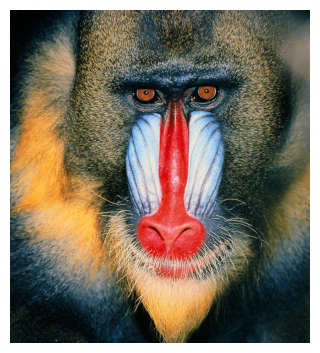

In [2]:
image = cv2.imread('data/mandrill.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = jnp.array(image)
print(image.shape)
_ = img_plot_utils.plot_image(image, filename='results/mandrill.png')

# Create the Gaussian Pyramids here

This is taken from the YouTube video: https://www.youtube.com/watch?v=1GFQ4V8cV0o&list=PLhwIOYE-ldwL6h-peJADfNm8bbO3GlKEy&index=30

In [3]:
image1 = image.copy()
blur_filter = jnp.array([1/16, 4/16, 6/16, 4/16, 1/16])
number_of_pyramids = 3
pyramids = [ image1 ] # add the first Pyramids here



In [4]:
if True:
    for _ in range(1, number_of_pyramids):
        image_temp = []
        for channel in range(3):
            image_temp.append( img_utils.sepfir2(image1[:,:,channel], blur_filter, blur_filter) )
        image_temp = jnp.stack(image_temp, axis=2)
        image_temp = image_temp.astype(jnp.uint8)
        image_temp = image_temp[0:-1:2, 0:-1:2, :]
        pyramids.append( image_temp )
        image1 = image_temp.copy()
        del(image_temp)



Note that now this function is available directly so there is no need to explicitely create the Gaussian pyramids

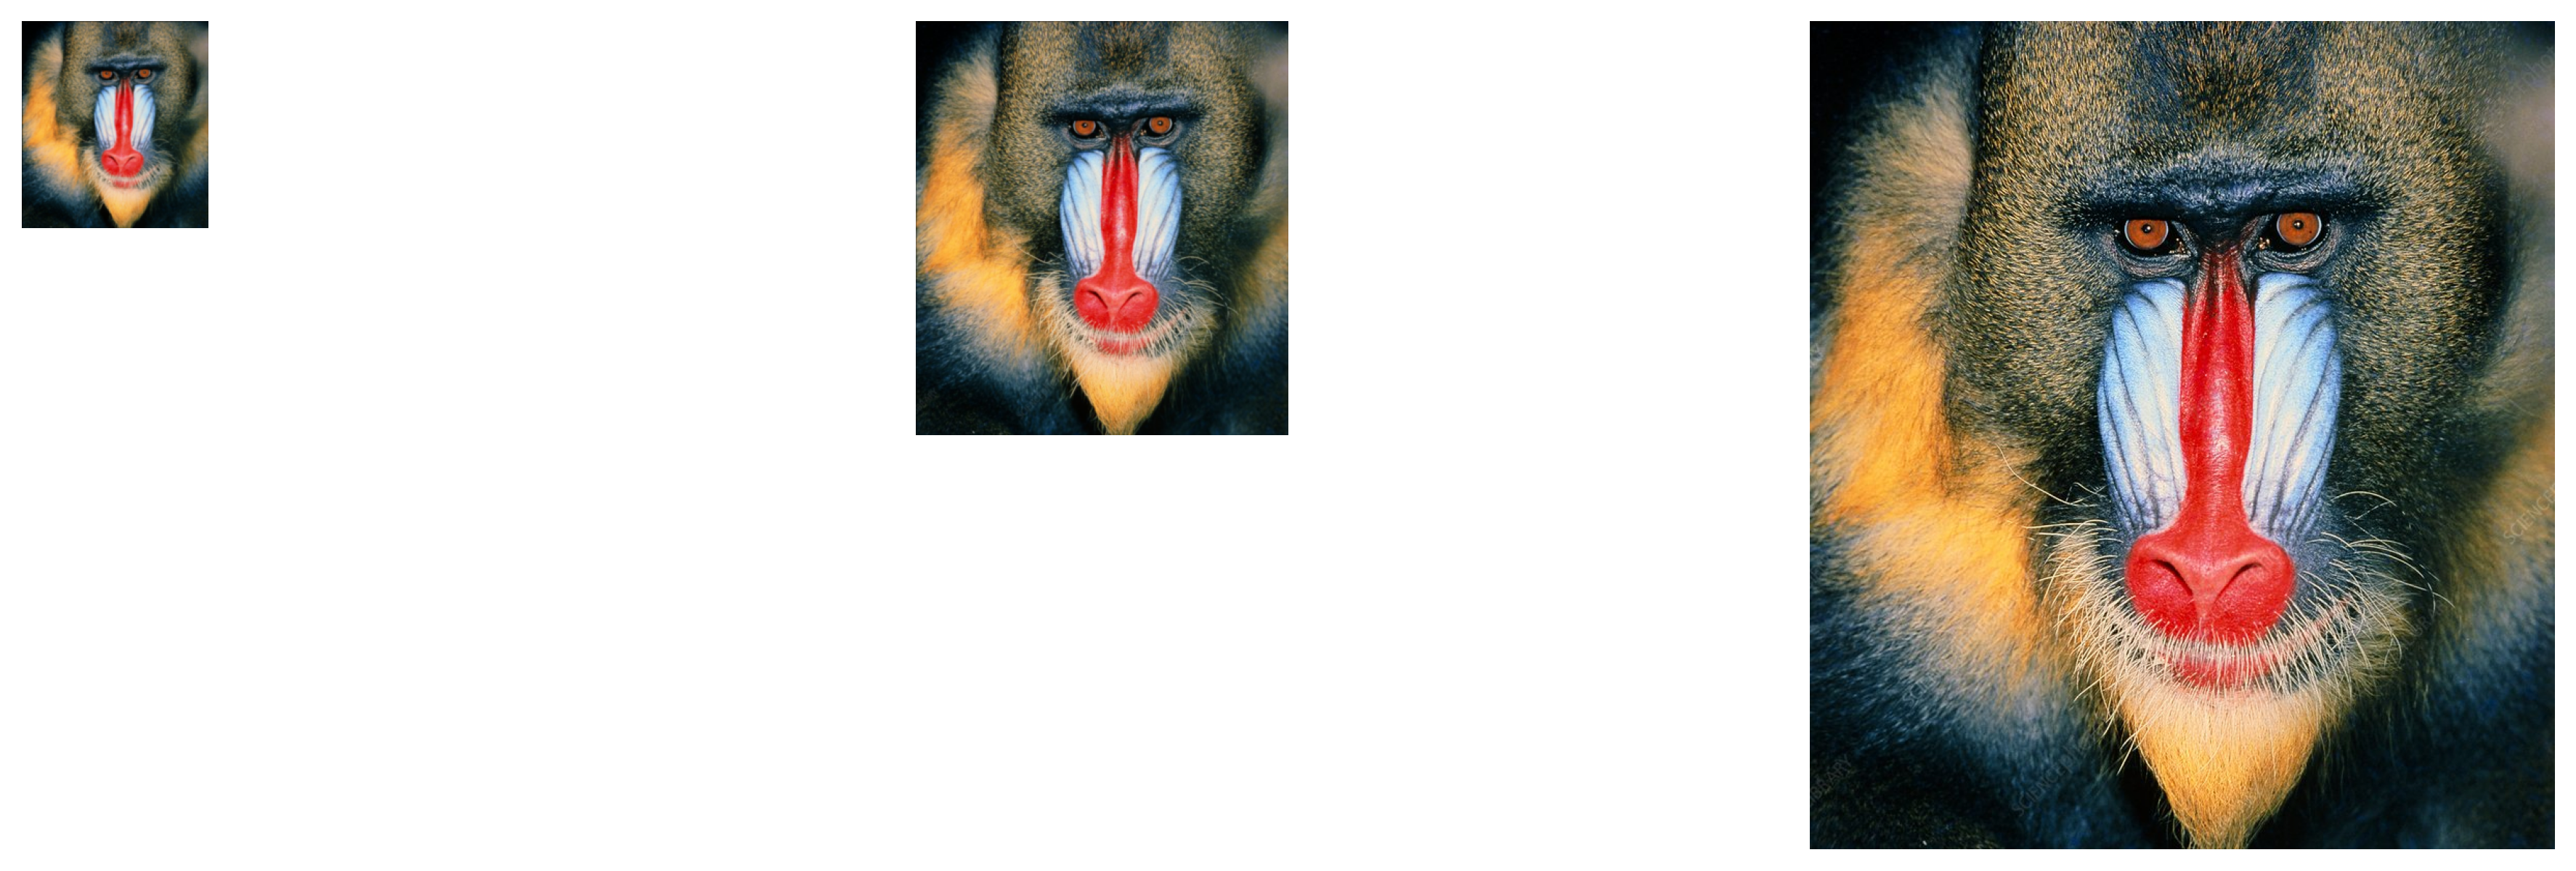

In [5]:
fig, axs = plt.subplots(
    nrows=1, ncols=number_of_pyramids, figsize=(15, 7),
    dpi=300, sharex = True, sharey = True
)

for i, ax in enumerate(axs):
    ax.imshow(pyramids[number_of_pyramids - i -1 ])
    ax.set_xticks([])
    ax.set_yticks([])
    for side in ['top', 'right', 'left', 'bottom']:
        ax.spines[side].set_visible(False)

plt.show()

In [6]:
image1 = image.copy()
blur_filter = jnp.array([1/16, 4/16, 6/16, 4/16, 1/16])
number_of_pyramids = 3
pyramids = [ image1 ] # add the first Pyramids here

In [7]:
pyramids = img_utils.gaussian_pyramids(image1.copy(), blur_filter, number_of_pyramids)

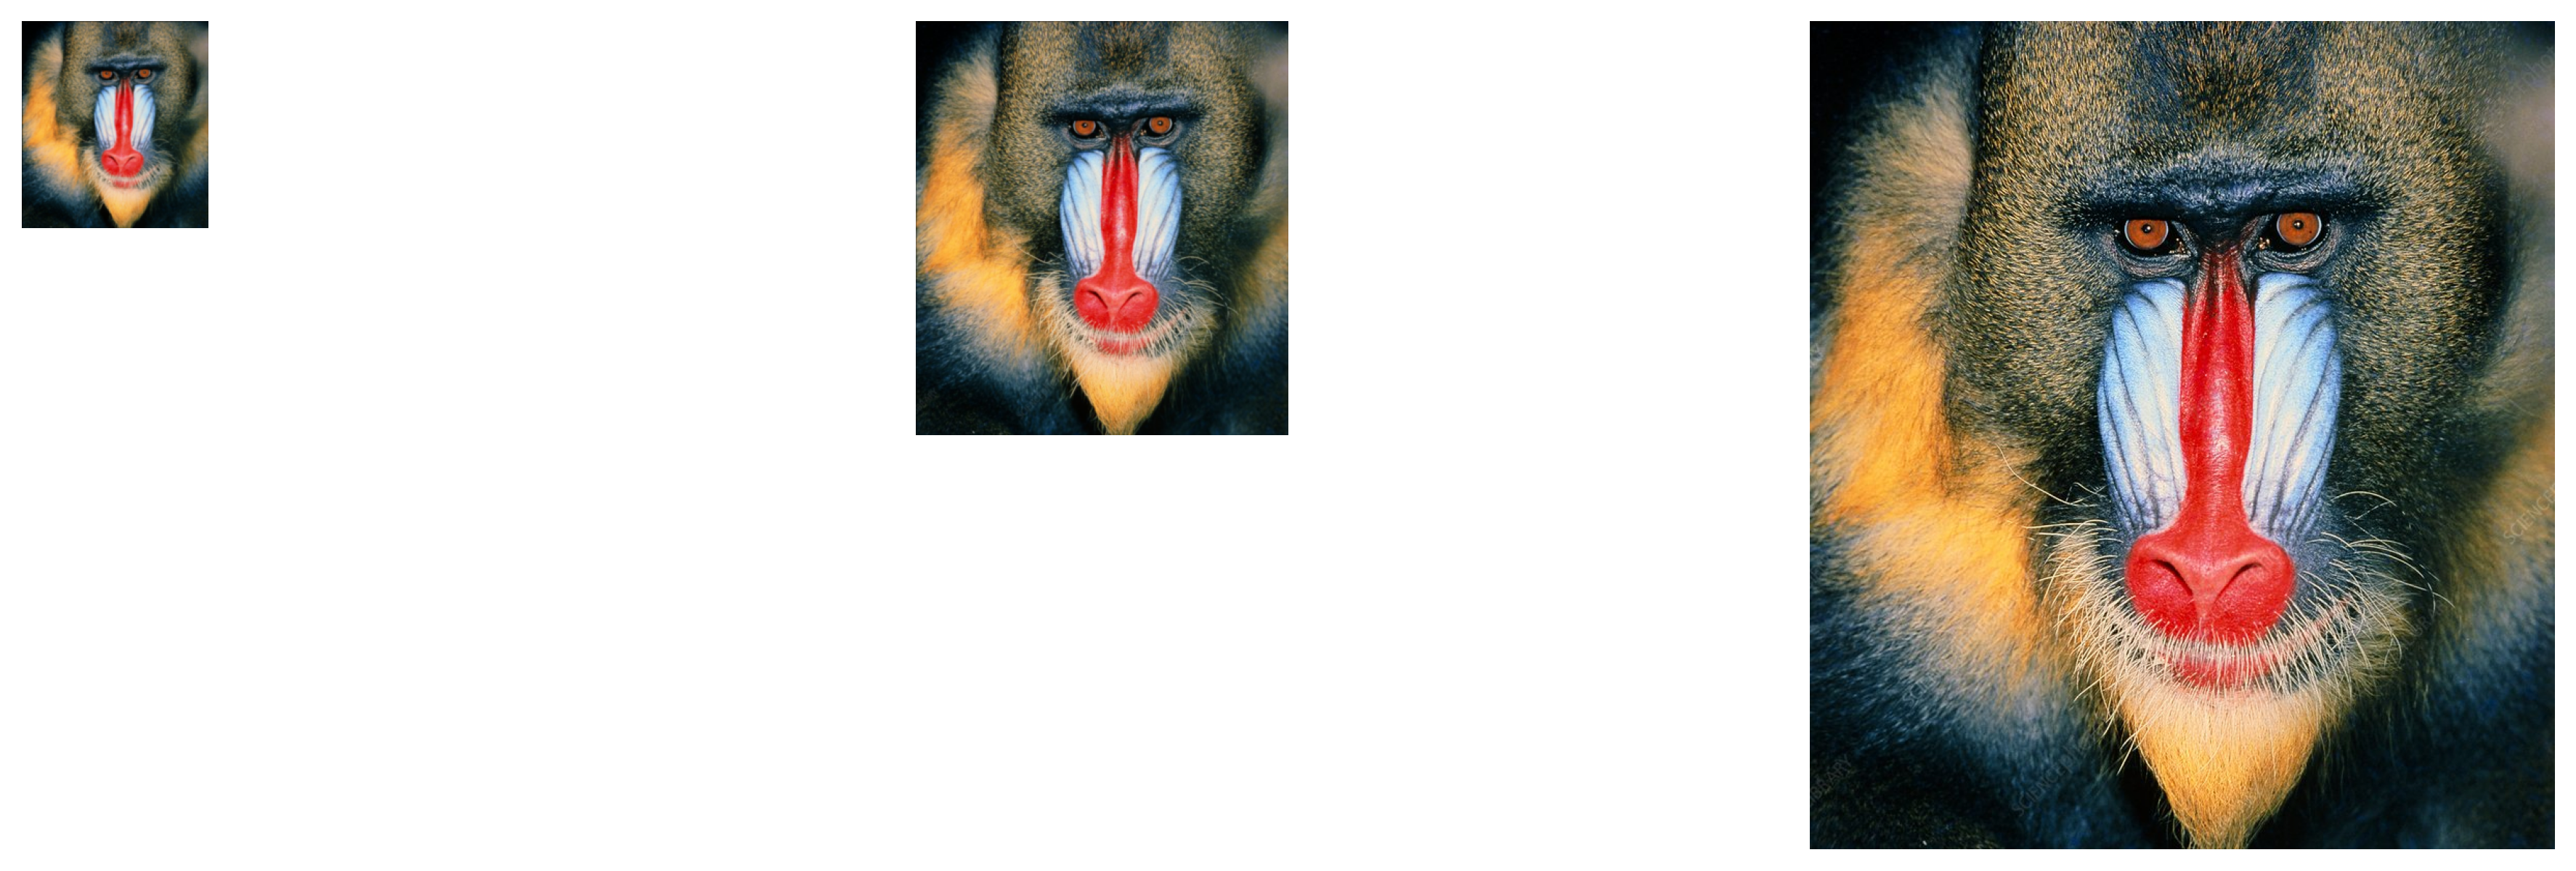

In [8]:
fig, axs = plt.subplots(
    nrows=1, ncols=number_of_pyramids, figsize=(15, 7),
    dpi=300, sharex = True, sharey = True
)

for i, ax in enumerate(axs):
    ax.imshow(pyramids[number_of_pyramids - i -1 ])
    ax.set_xticks([])
    ax.set_yticks([])
    for side in ['top', 'right', 'left', 'bottom']:
        ax.spines[side].set_visible(False)

plt.show()